(512, 512)


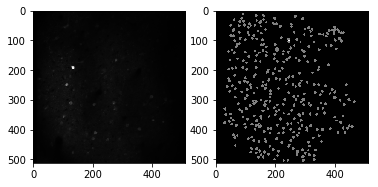

(512, 512)


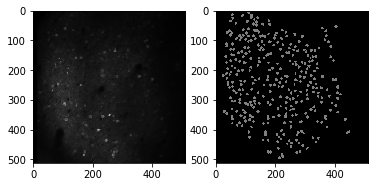

In [11]:
import json
import matplotlib.pyplot as plt
from numpy import array, zeros
from scipy.misc import imread
from glob import glob
from scipy.misc import imsave
import os

dataset_names = sorted([
    #'neurofinder.00.00', 'neurofinder.00.01',
    'neurofinder.00.02', 'neurofinder.00.03', 
    #'neurofinder.00.04', 'neurofinder.00.05',
    #'neurofinder.00.06', 'neurofinder.00.07', 'neurofinder.00.08',
    #'neurofinder.00.09', 'neurofinder.00.10', 'neurofinder.00.11',
    #'neurofinder.01.00', 'neurofinder.01.01', 'neurofinder.02.00',
    #'neurofinder.02.01', 'neurofinder.03.00', 'neurofinder.04.00',
    #'neurofinder.04.01', 'neurofinder.00.00.test', 'neurofinder.00.01.test',
    #'neurofinder.01.00.test', 'neurofinder.01.01.test', 'neurofinder.02.00.test',
    #'neurofinder.02.01.test', 'neurofinder.03.00.test', 'neurofinder.04.00.test',
    #'neurofinder.04.01.test'
    ])

def tomask(coords):
    x,y = [c[0] for c in coords], [c[1] for c in coords]
    mask = zeros(dims)
    mask[x,y] = 1
    return mask

PATH = os.getcwd()
datasets_dir = PATH + '/codeneuro_data'

for name in dataset_names:
    img_path = datasets_dir +'/'+ name
    # load the images
    files = sorted(glob(img_path+'/images/*.tiff'))
    imgs = array([imread(f) for f in files])
    dims = imgs.shape[1:]
    print(dims)

    # load the regions (training data only)
    with open(img_path+'/regions/regions.json') as f:
        regions = json.load(f)

    masks = array([tomask(s['coordinates']) for s in regions])

    imsave(img_path+'/masks.tiff', masks.sum(axis=0))
    imsave(img_path+'/images.tiff', imgs.sum(axis=0))

    # show the outputs
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(imgs.sum(axis=0), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(masks.sum(axis=0), cmap='gray')
    plt.show()